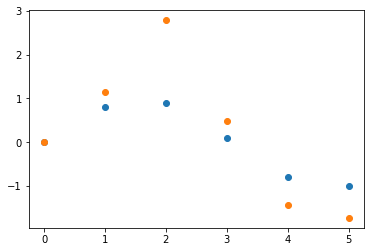

In [19]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

#GENERO DATOS QUE SE ME OCURRIERON
error = np.random.standard_exponential(6)
x = np.array([0,1,2,3,4,5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])
y_mod = y+y*error

plt.scatter(x,y)
plt.scatter(x,y_mod)

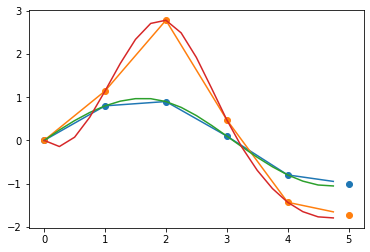

In [20]:
xc = np.arange(0,5,0.25)

f = interp1d(x,y)
f_mod = interp1d(x,y_mod)
f2 = interp1d(x,y,kind='cubic')
f2_mod = interp1d(x,y_mod,kind='cubic')

plt.scatter(x,y)
plt.scatter(x,y_mod)

plt.plot(xc,f(xc))
plt.plot(xc,f_mod(xc))
plt.plot(xc,f2(xc))
plt.plot(xc,f2_mod(xc))

# Aproximacion
Ahora veamos regresion lineal

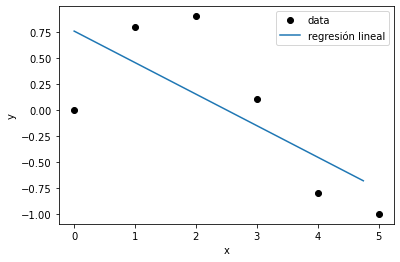

In [23]:
# La regresión lineal ajusta una recta a los datos:

from scipy.stats import linregress

m, n, r_value, p_value, std_err = linregress(x, y)

# Graficamos:
fig, ax = plt.subplots()
ax.plot(x, y, 'ok', label='data')
ax.plot(xc, m*xc + n, '-', label='regresión lineal')
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')

# Ajustar curvas
Busqueda de modelos

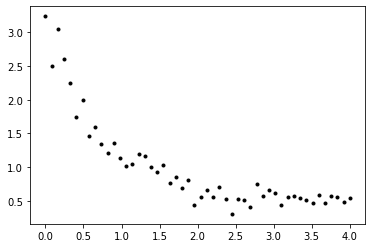

In [49]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b *x) + c

xdata = np.linspace(0,4,50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.15*y*np.random.normal(size=xdata.size)

plt.scatter(xdata,ydata,c='black',marker='.')

In [50]:
popt, pcov = curve_fit(func, xdata, ydata)

print("Parámetros optimizados: ", popt)
print("Matriz de covarianza:")
print(pcov)

Parámetros optimizados:  [2.67647182 1.38230756 0.50192148]
Matriz de covarianza:
[[ 0.00831352  0.00352636 -0.00037364]
 [ 0.00352636  0.00984124  0.00263192]
 [-0.00037364  0.00263192  0.00140181]]


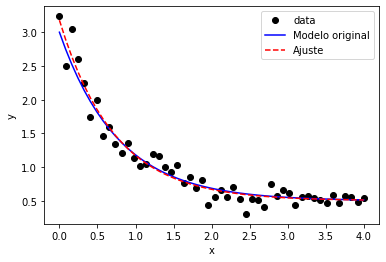

In [51]:
# Finalmente, graficamos los datos, la curva original y la ajustada:

fig, ax = plt.subplots()

ax.plot(xdata, ydata, 'ok', label="data")
ax.plot(xdata, func(xdata, 2.5, 1.3, 0.5), '-b', label="Modelo original")
ax.plot(xdata, func(xdata, *popt), '--r', label="Ajuste")
ax.set_xlabel("x"), ax.set_ylabel("y")
ax.legend(loc='best')